# **Лабораторная работа №2**

In [ ]:

import numpy as np

import matplotlib.pyplot as plt



from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?


In [ ]:
import pandas as pd

data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]


df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [ ]:
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
print(f'Вероятность отправиться на прогулку, если пойдет дождь равна: {(p_stroll*p_rain_if_stroll)/p_rain}')

Вероятность отправиться на прогулку, если пойдет дождь равна: 0.3333333333333333


## Задание 2

- загрузите датасет для классификации, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML/ClassificationSecondLab/csgo_task.csv").drop_duplicates()
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116789 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         116789 non-null  float64
 1   ct_score          116789 non-null  float64
 2   t_score           115765 non-null  float64
 3   map               116578 non-null  object 
 4   bomb_planted      116789 non-null  bool   
 5   ct_health         116789 non-null  float64
 6   t_health          116007 non-null  float64
 7   ct_armor          116789 non-null  float64
 8   t_armor           116789 non-null  float64
 9   ct_money          116789 non-null  float64
 10  t_money           116789 non-null  float64
 11  ct_helmets        116145 non-null  float64
 12  t_helmets         115941 non-null  float64
 13  ct_defuse_kits    116145 non-null  float64
 14  ct_players_alive  116789 non-null  float64
 15  t_players_alive   116561 non-null  float64
dtypes: bool(1), float64(

### Заполнение пустых значений

In [ ]:
import numpy as np
from scipy.stats import *

for column in data.columns:
  if data[column].dtype == 'float64':
    valuesNotNaN = data[column].dropna()
    data[column] = data[column].fillna(round(sum(valuesNotNaN)/len(valuesNotNaN)))
  elif data[column].dtype == 'object':
    valuesNotNaN = data[column].dropna()
    data[column] = data[column].fillna(mode(valuesNotNaN).mode[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116789 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         116789 non-null  float64
 1   ct_score          116789 non-null  float64
 2   t_score           116789 non-null  float64
 3   map               116789 non-null  object 
 4   bomb_planted      116789 non-null  bool   
 5   ct_health         116789 non-null  float64
 6   t_health          116789 non-null  float64
 7   ct_armor          116789 non-null  float64
 8   t_armor           116789 non-null  float64
 9   ct_money          116789 non-null  float64
 10  t_money           116789 non-null  float64
 11  ct_helmets        116789 non-null  float64
 12  t_helmets         116789 non-null  float64
 13  ct_defuse_kits    116789 non-null  float64
 14  ct_players_alive  116789 non-null  float64
 15  t_players_alive   116789 non-null  float64
dtypes: bool(1), float64(

In [ ]:
data.corr()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
time_left,1.000000,0.020826,0.012148,-0.487229,0.681016,0.670205,-0.049667,-0.161799,0.430800,0.399658,-0.046571,-0.187088,-0.024354,0.635987,0.590768
ct_score,0.020826,1.000000,0.627250,-0.021116,0.025631,-0.001652,0.088816,0.023077,0.245048,0.064655,0.172811,0.046722,0.245453,0.022135,-0.007253
t_score,0.012148,0.627250,1.000000,-0.014193,0.009480,0.009456,0.022936,0.073065,0.062193,0.257115,-0.019088,0.127559,0.050480,0.006958,0.003350
bomb_planted,-0.487229,-0.021116,-0.014193,1.000000,-0.616396,-0.441211,-0.303669,-0.112080,-0.201441,-0.136752,-0.200147,-0.068537,-0.166528,-0.621946,-0.393198
ct_health,0.681016,0.025631,0.009480,-0.616396,1.000000,0.748577,0.429718,0.168659,0.328887,0.239042,0.270366,0.091744,0.236288,0.971191,0.673293
t_health,0.670205,-0.001652,0.009456,-0.441211,0.748577,1.000000,0.196149,0.362367,0.257906,0.331622,0.086113,0.269193,0.067021,0.695426,0.951145
ct_armor,-0.049667,0.088816,0.022936,-0.303669,0.429718,0.196149,1.000000,0.272534,-0.064538,-0.170705,0.694031,0.196328,0.592469,0.462358,0.179063
t_armor,-0.161799,0.023077,0.073065,-0.112080,0.168659,0.362367,0.272534,1.000000,-0.188596,-0.080784,0.103865,0.886970,0.096328,0.157261,0.420528
ct_money,0.430800,0.245048,0.062193,-0.201441,0.328887,0.257906,-0.064538,-0.188596,1.000000,0.355703,0.233066,-0.130512,0.343199,0.321034,0.221350
t_money,0.399658,0.064655,0.257115,-0.136752,0.239042,0.331622,-0.170705,-0.080784,0.355703,1.000000,-0.214363,0.079087,-0.146686,0.212617,0.322503


### Перевод категориальных признаков в числовой тип данных

In [ ]:
data['bomb_planted'] = (data['bomb_planted']).astype(np.byte)
d = data.groupby(['map', 'bomb_planted'])['bomb_planted'].count()
d

map          bomb_planted
de_cache     0                 133
             1                  11
de_dust2     0               18400
             1                2667
de_inferno   0               19944
             1                3095
de_mirage    0               15572
             1                2091
de_nuke      0               16064
             1                1851
de_overpass  0               12053
             1                1339
de_train     0               11415
             1                1410
de_vertigo   0                9524
             1                1220
Name: bomb_planted, dtype: int64

In [ ]:
df = pd.get_dummies(data, columns=['map'])
df

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,...,5.0,5.0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,...,5.0,5.0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,...,5.0,5.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,1,200.0,242.0,195.0,359.0,100.0,5950.0,...,2.0,4.0,0,0,0,0,0,0,1,0
122406,174.93,11.0,15.0,0,500.0,500.0,95.0,175.0,11500.0,23900.0,...,5.0,5.0,0,0,0,0,0,0,1,0
122407,114.93,11.0,15.0,0,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,0,0,0,0,0,0,1,0
122408,94.93,11.0,15.0,0,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop(['ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_armor', 't_armor'], axis=1)
df.describe()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
count,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000,116789.00000,116789.000000,116789.000000,116789.000000,116789.000000,116789.000000
mean,94.214549,6.775570,6.838127,0.117169,408.014154,398.066958,10011.058404,11511.858565,4.240177,4.230741,0.001233,0.180385,0.19727,0.151239,0.153396,0.114668,0.109813,0.091995
std,53.048789,4.803405,4.812977,0.321622,134.035719,141.114284,11270.280297,12213.134892,1.223629,1.245803,0.035092,0.384510,0.39794,0.358283,0.360371,0.318623,0.312658,0.289020
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.900000,3.000000,3.000000,0.000000,333.000000,309.000000,1300.000000,1650.000000,4.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.880000,6.000000,6.000000,0.000000,500.000000,498.000000,6000.000000,7750.000000,5.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,114.960000,10.000000,10.000000,0.000000,500.000000,500.000000,15050.000000,18350.000000,5.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,1.000000,500.000000,600.000000,80000.000000,80000.000000,5.000000,6.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.to_csv("/content/drive/MyDrive/ML/ClassificationSecondLab/csgo_task_update.csv")

### Выделение целевого признака и предикторов

In [ ]:
y = df['bomb_planted']
X = df.drop(['bomb_planted'], axis=1)

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    0
122407    0
122408    0
122409    0
Name: bomb_planted, Length: 116789, dtype: int8

In [ ]:
X

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,500.0,500.0,4000.0,4000.0,5.0,5.0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,500.0,500.0,600.0,650.0,5.0,5.0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,391.0,400.0,750.0,500.0,4.0,4.0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,391.0,400.0,750.0,500.0,4.0,4.0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,500.0,500.0,18350.0,10750.0,5.0,5.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,200.0,242.0,100.0,5950.0,2.0,4.0,0,0,0,0,0,0,1,0
122406,174.93,11.0,15.0,500.0,500.0,11500.0,23900.0,5.0,5.0,0,0,0,0,0,0,1,0
122407,114.93,11.0,15.0,500.0,500.0,1200.0,6700.0,5.0,5.0,0,0,0,0,0,0,1,0
122408,94.93,11.0,15.0,500.0,500.0,1200.0,6700.0,5.0,5.0,0,0,0,0,0,0,1,0


- В случае дисбаланса проведите балансировку

### Балансировка




In [ ]:
from imblearn.under_sampling import RandomUnderSampler

print(f"Количество объектов каждого класса до under_sampling: \n{y.value_counts()}")
underSampler = RandomUnderSampler(sampling_strategy='majority')
X_under_sample, y_under_sample = underSampler.fit_resample(X, y)
print(f"Количество объектов каждого класса после under_sampling: \n{y_under_sample.value_counts()}")

Количество объектов каждого класса до under_sampling: 
0    103105
1     13684
Name: bomb_planted, dtype: int64
Количество объектов каждого класса после under_sampling: 
0    13684
1    13684
Name: bomb_planted, dtype: int64


In [ ]:
X

### Разбиение на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under_sample, y_under_sample, test_size=0.2, random_state = 4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((21894, 17), (21894,), (5474, 17), (5474,))

- Масштабируйте числовые признаки

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train, y_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
X_train_std

array([[ 0.08816501, -1.38028188, -1.42613645, ..., -0.34791457,
        -0.34634518, -0.31672005],
       [-0.86160396, -0.12843089,  0.89284583, ..., -0.34791457,
        -0.34634518, -0.31672005],
       [ 1.9285053 ,  0.91477826,  0.04957954, ..., -0.34791457,
        -0.34634518, -0.31672005],
       ...,
       [-0.64864126,  0.4974946 , -0.16123703, ..., -0.34791457,
        -0.34634518, -0.31672005],
       [ 0.72481925, -0.33707272,  0.68202926, ..., -0.34791457,
         2.88729295, -0.31672005],
       [-0.83610056, -0.33707272,  1.52529554, ..., -0.34791457,
         2.88729295, -0.31672005]])

In [ ]:
X_test_std

array([[ 2.07910567,  0.4974946 , -0.16123703, ..., -0.34791457,
        -0.34634518, -0.31672005],
       [ 1.98472447,  2.16662925,  2.36856182, ..., -0.34791457,
        -0.34634518, -0.31672005],
       [-0.74004396,  0.4974946 , -0.16123703, ..., -0.34791457,
        -0.34634518, -0.31672005],
       ...,
       [-0.985584  , -1.17164005, -1.42613645, ...,  2.87426883,
        -0.34634518, -0.31672005],
       [-0.52801204, -0.33707272, -0.58287017, ..., -0.34791457,
        -0.34634518, -0.31672005],
       [-0.90069677,  1.74934558,  1.52529554, ..., -0.34791457,
        -0.34634518, -0.31672005]])

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.

### Метрики

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
def plot_roc_curve(y_true, probs):
    probs = probs[:, 1]
    auc_ = roc_auc_score(y_true, probs)
    print(' ROC AUC=%.3f' % (auc_))
    fpr, tpr, treshold = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='purple',
            label='ROC кривая (AUC = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def showMetrics(y_true, y_predict, y_proba):
    print(f"Accuracy: {accuracy_score(y_true, y_predict)}")
    print(f"Confusion matrix:\n {confusion_matrix(y_true, y_predict)}")
    print(f"Precision, Recall, F-score:\n{classification_report(y_true, y_predict)}")
    plot_roc_curve(y_true, y_proba)

### Метод k-ближайших соседей

Fitting 10 folds for each of 29 candidates, totalling 290 fits
{'n_neighbors': 7}
Accuracy: 0.9081110705151626
Confusion matrix:
 [[2401  383]
 [ 120 2570]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      2784
           1       0.87      0.96      0.91      2690

    accuracy                           0.91      5474
   macro avg       0.91      0.91      0.91      5474
weighted avg       0.91      0.91      0.91      5474

 ROC AUC=0.954


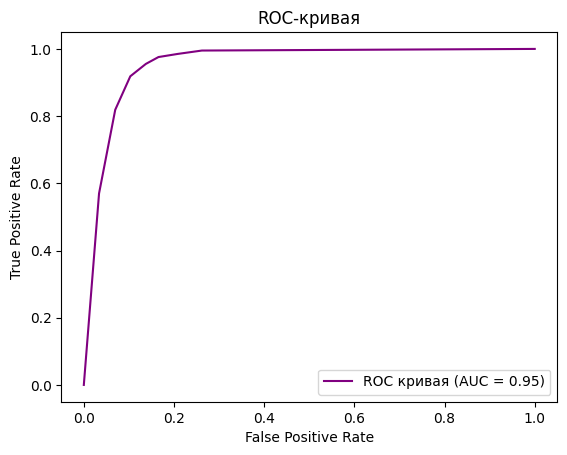

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
knn.fit(X_train_std, y_train)

y_knn_predict = knn.predict(X_test_std)
knn_probs = knn.predict_proba(X_test_std)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=grid.fit(X_train_std, y_train)
print(grid_search.best_params_)

knn_pred = grid.predict(X_test_std)
grid_knn_probs = grid.predict_proba(X_test_std)
showMetrics(y_test, knn_pred,  grid_knn_probs)

In [ ]:
def GNB(X_train, y_train, X_test, y_test):
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
    gnb = GaussianNB()
    gs = RandomizedSearchCV(gnb, param_distributions=params_NB, cv=5,verbose=1, 
                 scoring='accuracy')
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    gnb_pred = gs.predict(X_test)
    gnb_probs = gs.predict_proba(X_test)
    showMetrics(y_test, gnb_pred, gnb_probs)


Данные без масштабирования
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 1e-07}
Accuracy: 0.9090244793569602
Confusion matrix:
 [[2441  343]
 [ 155 2535]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2784
           1       0.88      0.94      0.91      2690

    accuracy                           0.91      5474
   macro avg       0.91      0.91      0.91      5474
weighted avg       0.91      0.91      0.91      5474

 ROC AUC=0.958


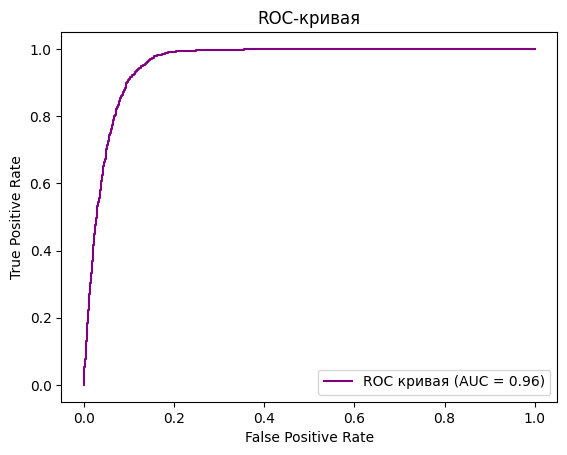

Данные с стандартизацией
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 3.511191734215127e-05}
Accuracy: 0.9009864815491414
Confusion matrix:
 [[2437  347]
 [ 195 2495]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2784
           1       0.88      0.93      0.90      2690

    accuracy                           0.90      5474
   macro avg       0.90      0.90      0.90      5474
weighted avg       0.90      0.90      0.90      5474

 ROC AUC=0.953


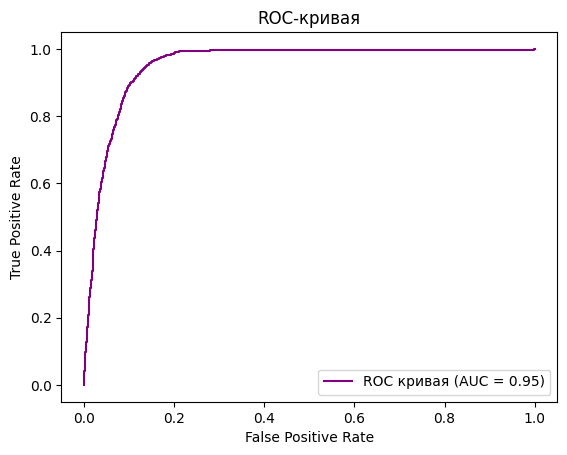

In [ ]:
print("Данные без масштабирования")
GNB(X_train, y_train, X_test, y_test)
print("Данные с стандартизацией")
GNB(X_train_std, y_train, X_test_std, y_test)

### Логистическая регрессия

In [ ]:
def LogisticRegressionFunc(X_train, y_train, X_test, y_test):
    logistic = LogisticRegression(random_state=0)
    distributions = dict(C= np.arange(1,10,0.1),penalty=['l2', 'l1'])
    clf = RandomizedSearchCV(logistic, distributions, random_state=0)
    search = clf.fit(X_train, y_train)
    print(search.best_params_)
    best_params = search.best_params_
    logRes = LogisticRegression(penalty=best_params["penalty"], C= best_params["C"])
    logRes.fit(X_train, y_train)
    pred = logRes.predict(X_test)
    probs = logRes.predict_proba(X_test)
    showMetrics(y_test, pred, probs)

In [ ]:
print("Данные без масштабирования")
LogisticRegressionFunc(X_train, y_train, X_test, y_test )
print("Данные с стандартизацией")
LogisticRegressionFunc(X_train_std, y_train, X_test_std, y_test )

Данные без масштабирования


NameError: ignored

In [ ]:
def SVMCall(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
    grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
    search = grid.fit(X_train, y_train)
    print(search.best_params_)
    pred = grid.predict(X_test)
    probs = grid.predict_proba(X_test)
    showMetrics(y_test, pred, probs)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time= 3.0min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time= 2.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time= 3.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time= 3.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time= 3.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time= 3.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time= 2.9min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time= 3.0min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time= 3.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time= 3.3min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.507 total time= 4.0min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

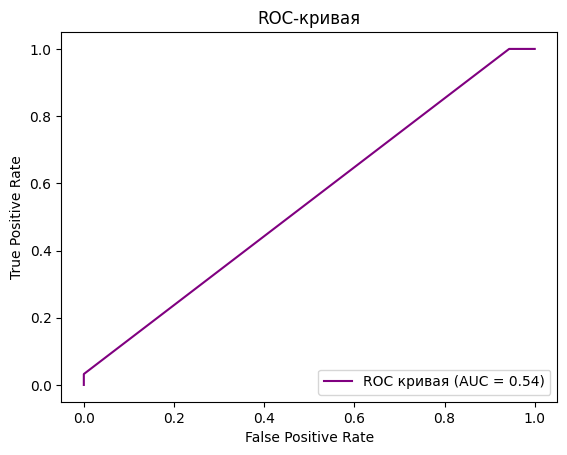

In [ ]:
SVMCall(X_train, y_train, X_test, y_test )

## Задание 3
* Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

In [ ]:
class MetricsClassification:
    @staticmethod
    def accuracy(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return len([x for x, y  in zip(y_true, predictions) if x  == y])/len(y_true)
    
    @staticmethod
    def confusion_matrix(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        TP = FP =TN =FN = 0
        for test, pred in zip(y_true, predictions):
            if (test == 1 and pred == 1):
                TP += 1 
            elif (test == 0 and pred == 0):
                TN += 1
            elif (test == 1 and pred == 0):
                FN += 1
            elif (test == 0 and pred == 1):
                FP += 1
        return [[TP, FP], [FN, TN]]
    @staticmethod
    def precision( y_test, y_pred):
        matrix = MetricsClassification.confusion_matrix(y_test, y_pred)
        TP = matrix[0][0]
        FP = matrix[0][1]
        return TP/(TP + FP)
    @staticmethod
    def recall(y_test, y_pred):
        matrix = MetricsClassification.confusion_matrix(y_test, y_pred)
        TP = matrix[0][0]
        FN = matrix[1][0]
        return TP/(TP + FN)
    
    @staticmethod
    def f_score(y_test, y_pred):
        recall_score = MetricsClassification.recall(y_test, y_pred)
        precision_score = MetricsClassification.precision(y_test, y_pred)
        return 2*(recall_score * precision_score)/ (recall_score+precision_score)

In [ ]:
def ShowMetrics(y_true, y_pred):
  print("Собственная ----- Библиотека")
  print(f"{MetricsClassification.accuracy(y_true, y_pred)} ----- {accuracy_score(y_true, y_pred)}")
  print(f"{MetricsClassification.confusion_matrix(y_true, y_pred)} ----- {confusion_matrix(y_true, y_pred)}")
  print(f"{MetricsClassification.precision(y_true, y_pred)} ----- {precision_score(y_true, y_pred)}")
  print(f"{MetricsClassification.recall(y_true, y_pred)} ----- {recall_score(y_true, y_pred)}")
  print(f"{MetricsClassification.f_score(y_true, y_pred)} ----- {f1_score(y_true, y_pred)}")

### Собственная реализация knn

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

In [ ]:
def get_distances_(x_test, x_train):
        distances = []
        for x in x_train:
            distance = euclidean_distance(x_test, x)
            distances.append(distance)
        return distances

In [ ]:
def most_common(list):
    return max(set(list), key=list.count)

In [ ]:
class KNeighborsClassifier:
    def __init__( self, k) :
        self.k = k
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.y_train = y_train
        return self
    
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = get_distances_(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))][:self.k]
            neighbors.append(y_sorted)
        return list(map(most_common, neighbors))

In [ ]:
knn = KNeighborsClassifier(k=5)
model = knn.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
ShowMetrics(y_test, pred)

Собственная ----- Библиотека
0.8438070880526124 ----- 0.8438070880526124
[[2332, 497], [358, 2287]] ----- [[2287  497]
 [ 358 2332]]
0.8243195475433015 ----- 0.8243195475433015
0.866914498141264 ----- 0.866914498141264
0.8450806305490125 ----- 0.8450806305490125


In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        self.n_classes = len(self._classes)

        self.mean = np.zeros((self.n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((self.n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(self.n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]

            self.mean[idx, :] = X_c.mean(axis=0)

            self.var[idx, :] = X_c.var(axis=0)

            self.priors[idx] = X_c.shape[0] / float(n_samples)
        return self

    def predict(self, X):
        y_pred = []
        for x_test in X:
            p = {}

            for index_class in range(self.n_classes):
                p[index_class] = self.priors[index_class]

                for index, feature in enumerate(x_test):
                    p[index_class] *= self.gaussian_density(feature, self.mean[index_class][index],self.var[index_class][index])
            y_pred.append(pd.Series(p).values.argmax()) 
        return y_pred  

    def gaussian_density(self, x, mean, var):
        if(var == 0):
            return 1
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        result = const * proba
        return result

In [ ]:
bayes = NaiveBayes()
model = bayes.fit(X_train, y_train)
predictions = model.predict(X_test)

(10900, 18)
[[114.94  17.    18.   ...   0.     0.     0.  ]
 [ 94.96   3.     5.   ...   0.     0.     0.  ]
 [ 94.88   1.    12.   ...   1.     0.     0.  ]
 ...
 [ 74.91   4.     5.   ...   0.     0.     0.  ]
 [ 74.95   9.     3.   ...   0.     0.     0.  ]
 [114.95   4.    12.   ...   0.     0.     0.  ]] [[1.03357568e+02 6.81458716e+00 6.84944954e+00 0.00000000e+00
  4.38859908e+02 4.22033853e+02 1.08103119e+04 1.20081284e+04
  4.52660550e+00 4.42165138e+00 9.17431193e-04 1.77889908e-01
  1.90000000e-01 1.51743119e-01 1.55412844e-01 1.17522936e-01
  1.13211009e-01 9.33027523e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(10994, 18)
[[17.03  6.   11.   ...  0.    0.    0.  ]
 [22.95  5.    9.   ...  0.    0.    0.  ]
 [19.88 13.   14.   ...  0.

In [ ]:
ShowMetrics(y_test, predictions)

Собственная ----- Библиотека
0.9061015710632079 ----- 0.9061015710632079
[[2491, 315], [199, 2469]] ----- [[2469  315]
 [ 199 2491]]
0.8877405559515325 ----- 0.8877405559515325
0.9260223048327137 ----- 0.9260223048327137
0.9064774381368268 ----- 0.9064774381368268
